Import required libaries

In [71]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Then we insert all the required connection properties

In [72]:
conn = pyodbc.connect('Driver={SQL Server};' # This is what server type we are connecting to
                      'Server=BASIL\SERVER1;' # This is the location and name of the server, same as what we use to connect using SSMS
                      'Database=AdventureWorks2019;' # This is which database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # This allows us to forgo entering a trusted key or password because we are the admin of this computer and the...
                    # ... database has been configured to allow this user when we set it up. 

Now we create the cursor

In [73]:
cursor = conn.cursor()

Here we define what query we want executed in the database

In [74]:
query = '''SELECT E.BusinessEntityID, SP.Bonus, E.vacationhours AS 'Vacation Hours', D.Name, SalesLastyear, SalesYTD, CommissionPct
FROM HumanResources.EmployeeDepartmentHistory AS EDH
INNER JOIN Sales.SalesPerson AS SP
ON SP.BusinessEntityID = EDH.BusinessEntityID
INNER JOIN HumanResources.Department AS D
ON EDH.DepartmentID = D.DepartmentID
INNER JOIN HumanResources.Employee AS E
ON EDH.BusinessEntityID = E.BusinessEntityID


ORDER BY SalesLastyear
'''



Here we assign the resulting table returned from the database as a variable 'salesdata'. 
This is also where our connection actually runs using the defined properties and query above

In [75]:
salesdata = pd.read_sql(query, conn)

C:\Users\basil\AppData\Local\Temp\ipykernel_12828\1111421933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


Let's get a preview of what our data looks like:

In [76]:
print(salesdata.head())
print(salesdata) in range(15)

# as there are some 0 values in bonus we will still keep these as they do affect the data analysis

   BusinessEntityID   Bonus  Vacation Hours   Name  SalesLastyear  \
0               274     0.0              14  Sales   0.000000e+00   
1               284  3900.0              39  Sales   0.000000e+00   
2               285     0.0              20  Sales   0.000000e+00   
3               287     0.0              21  Sales   0.000000e+00   
4               288    75.0              35  Sales   1.307950e+06   

       SalesYTD  CommissionPct  
0  5.596976e+05          0.000  
1  1.576562e+06          0.019  
2  1.725245e+05          0.000  
3  5.199059e+05          0.000  
4  1.827067e+06          0.018  
    BusinessEntityID   Bonus  Vacation Hours   Name  SalesLastyear  \
0                274     0.0              14  Sales   0.000000e+00   
1                284  3900.0              39  Sales   0.000000e+00   
2                285     0.0              20  Sales   0.000000e+00   
3                287     0.0              21  Sales   0.000000e+00   
4                288    75.0         

False

After we have the table we can now make a scatter plot, to make the scatter plot with a trendline i had to use numpy as numpy has the function needed for the trendline, i transformed my points into a numpy array, this allows us to make calculations with the dataset

Pearson Correlation Coefficient: 0.382


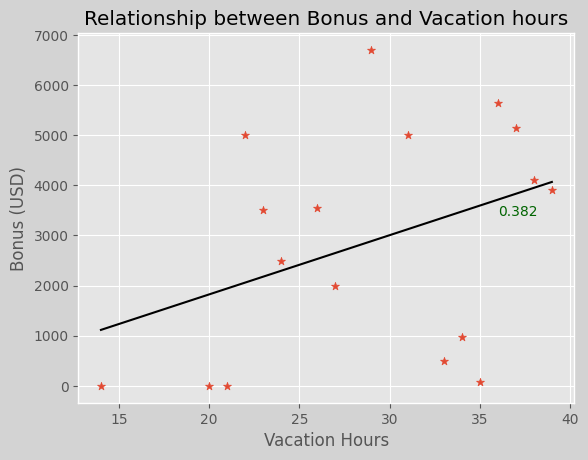

In [77]:
#creating a numpy array so i can use my data from sql to work out correlation

x = np.array(salesdata['Vacation Hours'])
y = np.array(salesdata['Bonus'])

coefficients = np.polyfit(x, y, 1)
m, b = coefficients

# Generate the trendline data
trendline_x = np.linspace(min(x), max(x), 100)
trendline_y = m * trendline_x + b

plt.scatter(x, y, marker = '*')
plt.xlabel('Vacation Hours')
plt.ylabel('Bonus (USD)')
plt.gcf().set_facecolor('lightgray')

# Plot the trendline
plt.plot(trendline_x, trendline_y, color='black', label='Trendline')

correlation = np.corrcoef(x, y)[0, 1]
roundcorr = round(correlation, 3)
print("Pearson Correlation Coefficient: " + str(roundcorr))
plt.text(36, 3400, str(roundcorr), color = 'darkgreen')
plt.style.use('ggplot')
plt.title('Relationship between Bonus and Vacation hours')


# Show the data in a chart
plt.show()

# the 3 bonuses as 0 are the managers and not sales representatives

# shows pos correlation as bonus rise vacation hours also rise, this could be die to the fact the people ahve more money top spend thus they have more vacations, also as there is positive
# correlation with vaaction hours and sales, this could suggest that as a person makes more sales they are allocated more vacation hours which also relates to the reasoning that as a person 
# has more sales they will be allocated more vacation hours, as well as a higher bonus which then all relates to the positive relationship that as vacation hours rise so does bonus, as employees 
# have more disposable income



Pearson Correlation Coefficient: 0.504


Text(0.5, 1.0, 'Relationship between Vacation hours and Sales')

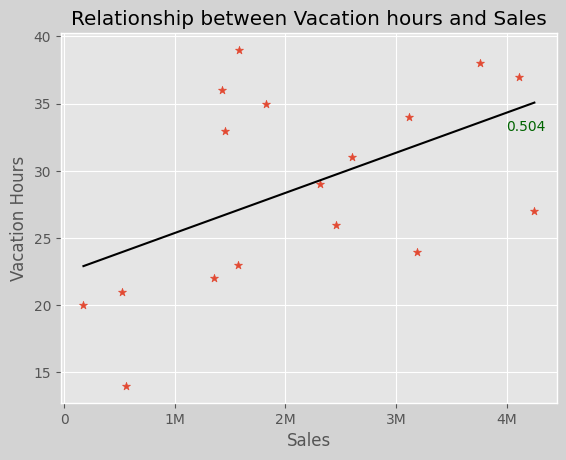

In [78]:
x = np.array(salesdata['Vacation Hours'])
sales = np.array(salesdata['SalesYTD'])

coefficients = np.polyfit(sales, x, 1)
m, b = coefficients

# Generate the trendline data
trendline_x = np.linspace(min(sales), max(sales), 100)
trendline_y = m * trendline_x + b

plt.scatter(sales, x, marker = '*')
plt.xlabel('Sales')
plt.ylabel('Vacation Hours')
plt.xticks([0, 1000000, 2000000, 3000000, 4000000, 5000000], [0, '1M', '2M', '3M','4M','5M'])
plt.gcf().set_facecolor('lightgray')

# Plot the trendline
plt.plot(trendline_x, trendline_y, color='black', label='Trendline')

correlation = np.corrcoef(sales, x)[0, 1]
roundcorr = round(correlation, 3)
print("Pearson Correlation Coefficient: " + str(roundcorr))
plt.text(4000000, 33, str(roundcorr), color = 'darkgreen')
plt.style.use('ggplot')
plt.title('Relationship between Vacation hours and Sales')

Pearson Correlation Coefficient: 0.527


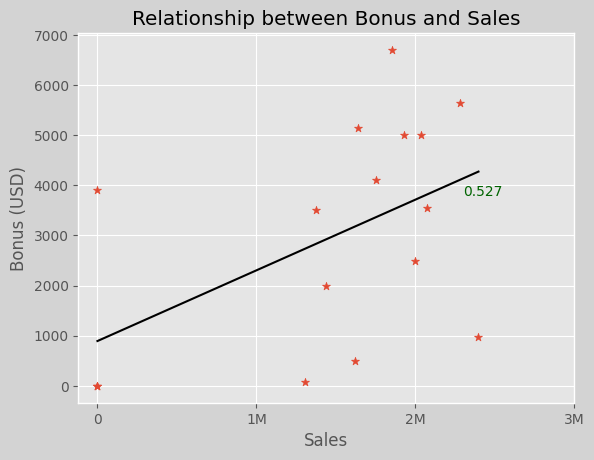

In [79]:
# 'saleslastyear' was used since the sales of last year will determine the bonus of the employee this year

sales = np.array(salesdata['SalesLastyear'])
y = np.array(salesdata['Bonus'])

coefficients = np.polyfit(sales, y, 1)
m, b = coefficients

# Generate the trendline data
trendline_x = np.linspace(min(sales), max(sales), 100)
trendline_y = m * trendline_x + b

plt.scatter(sales, y, marker = '*')
plt.xlabel('Sales')
plt.ylabel('Bonus (USD)')
plt.gcf().set_facecolor('lightgray')

# Plot the trendline
plt.plot(trendline_x, trendline_y, color='black', label='Trendline')

correlation = np.corrcoef(sales, y)[0, 1]
roundcorr = round(correlation, 3)
print("Pearson Correlation Coefficient: " + str(roundcorr))
plt.text(2300000, 3800, str(roundcorr), color = 'darkgreen')
plt.style.use('ggplot')
plt.title('Relationship between Bonus and Sales')
plt.xticks([0, 1000000, 2000000, 3000000], [0,'1M', '2M', '3M'])


# Show the data in a chart
plt.show()

# we can see that a eomployee would have to make a minimum of 1 million in sales to be considered for a bonus

Pearson Correlation Coefficient: 0.488


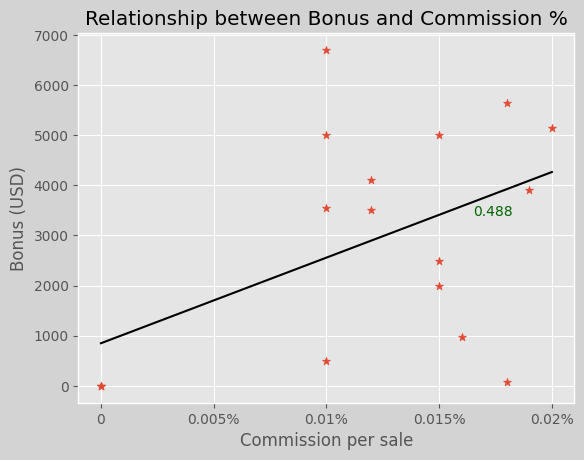

In [95]:

com = np.array(salesdata['CommissionPct'])
y = np.array(salesdata['Bonus'])

coefficients = np.polyfit(com, y, 1)
m, b = coefficients

# Generate the trendline data
trendline_x = np.linspace(min(com), max(com), 100)
trendline_y = m * trendline_x + b

plt.scatter(com, y, marker = '*')
plt.xlabel('Commission per sale')
plt.ylabel('Bonus (USD)')
plt.gcf().set_facecolor('lightgray')

# Plot the trendline
plt.plot(trendline_x, trendline_y, color='black', label='Trendline')

correlation = np.corrcoef(com, y)[0, 1]
roundcorr = round(correlation, 3)
print("Pearson Correlation Coefficient: " + str(roundcorr))
plt.text(0.0165, 3400, str(roundcorr), color = 'darkgreen')
plt.style.use('ggplot')
plt.title('Relationship between Bonus and Commission %')
plt.xticks([0, 0.005, 0.01, 0.015, 0.02], [0,'0.005%', '0.01%', '0.015%', '0.02%'])


# Show the data in a chart
plt.show()